 #  Prévision des tempêtes solaires mission RHESSI

--------------------------------------------------------------------------------------------------------------------------------------------------------------------



> ### Sujet : Analyse des données sur l’activité solaire pour prédire les tempêtes et leurs impacts.

## Contexte

L'imageur spectroscopique solaire à haute énergie Reuven Ramaty (RHESSI, à l'origine imageur spectroscopique solaire à haute énergie ou HESSI) est un observatoire d'éclairs solaires de la NASA. C'est la sixième mission du programme Small Explorer, sélectionnée en octobre 1997 et lancée le 5 février 2002. Sa mission principale est d'explorer la physique de l'accélération des particules et de la libération d'énergie dans les éruptions solaires.
HESSI a été rebaptisé RHESSI le 29 mars 2002 en l'honneur de Reuven Ramaty, un pionnier dans le domaine de la physique solaire à haute énergie. RHESSI est la première mission spatiale nommée d'après un scientifique de la NASA. RHESSI a été construit par Spectrum Astro pour le Goddard Space Flight Center et est exploité par le Space Sciences Laboratory à Berkeley, en Californie. Le chercheur principal de 2002 à 2012 était Robert Lin, qui a été remplacé par Säm Krucker.

## Introduction

Qu'est-ce qu'une éruption solaire ?

Une éruption solaire est la libération rapide d'une grande quantité d'énergie stockée dans l'atmosphère solaire. Pendant une éruption, le gaz est chauffé à 10 à 20 millions de degrés Kelvin (K) et rayonne de rayons X doux et d'émissions à longueur d'onde plus longue. Incapables de pénétrer dans l'atmosphère terrestre, les rayons X ne peuvent être détectés que depuis l'espace. Les instruments sur Skylab, SMM, la mission Yohkoh japonais/États et d'autres engins spatiaux ont enregistré de nombreuses éruptions dans les rayons X au cours des vingt dernières années environ. Les observatoires au sol ont enregistré les sorties visibles et radio. Ces données constituent la base de notre compréhension actuelle d'une éruption solaire. Mais il existe de nombreux mécanismes possibles pour chauffer le gaz, et les observations à ce jour n'ont pas été en mesure de les différencier.

Taux de crête : nombre de crêtes par seconde dans la gamme d'énergie 6-12 keV, moyenné sur les collimateurs actifs, y compris le bruit de fond.

Comptages totaux : comptages dans la gamme d'énergie 6-12 keV intégrés sur la durée de l'éruption, additionnés sur tous les sous-collimateurs, y compris l'arrière-plan,
y compris l'arrière-plan.

Énergie : la bande d'énergie la plus élevée dans laquelle l'éruption a été observée. Electron Kev (kilo électron volt)

Distance radiale : distance du centre du soleil

Codes de qualité : Qn, où n est le nombre total de données manquantes, de SAA, de particules, d'éclipses ou de drapeaux de décimation définis pour l'événement.
n est compris entre 0 et 11. Il convient d'être prudent lors de l'analyse des données lorsque la qualité n'est pas nulle.

Active_Region : Un numéro pour la région active la plus proche, si elle est disponible.

radial_offset : décalage de la position de l'éruption par rapport à l'axe de rotation du vaisseau spatial en arcsec. Ce paramètre est utilisé en
spectroscopie.

peak_c/s : taux de comptage de crête en points corrigés.

Codes des éruptions :

a0 - Dans l'état d'atténuation 0 (aucun) à un moment donné de l'éruption.

a1 - Dans l'état 1 de l'atténuateur (mince) à un moment donné pendant l'éruption

a2 - Atténuateur en état 2 (épais) à un moment donné pendant l'éruption

a3 - Dans l'état d'atténuation 3 (les deux) à un moment donné pendant l'éruption

An - État de l'atténuateur (0=Aucun, 1=Fin, 2=Épais, 3=Les deux) au plus fort de l'éruption

DF - Le nombre de segments avant a été décimé au cours de l'éruption.

DR - Le nombre de segments arrière a été décimé au cours de l'éruption.

ED - Eclipse du vaisseau spatial (nuit) à un moment donné pendant l'éruption

EE - L'éruption s'est terminée pendant l'éclipse du vaisseau spatial (nuit)

ES - L'éruption a commencé pendant l'éclipse du vaisseau spatial (nuit)

FE - Eruption en cours à la fin du fichier

FR - En mode rapide

GD - Manque de données pendant l'éruption

GE - L'éruption s'est terminée dans l'intervalle de données

GS - L'éruption a commencé pendant l'absence de données

MR - Véhicule spatial dans la zone des hautes latitudes pendant
l'éruption

NS - Événement non solaire

PE - Événement lié aux particules : Des particules sont présentes

PS - Éruption solaire possible ; dans les détecteurs avant, mais pas
de position

Pn - Qualité de la position : P0 = la position n'est pas valide, P1 = la position est valide

Qn - Qualité des données : Q0 = Qualité la plus élevée, Q11 = Qualité la plus faible

SD - Le vaisseau spatial se trouvait dans la zone de sécurité pendant l'éruption.

SE - L'éruption s'est terminée lorsque l'engin spatial se trouvait dans la zone d'exclusion stratégique

SS - L'éruption a commencé lorsque l'engin spatial se trouvait dans la zone de sécurité.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Pré-traitement du Dataset

In [1]:
# Importation des bibliothèques

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno #Bibliothèque adapté pour la représentation des valeurs manquantes
import sklearn
import warnings
warnings.filterwarnings("ignore")

#Modification de la police d'écriture des graphes
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
# Visualisation du dataset

df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv")

df.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


#### Caractéristiques du Datast

In [3]:
# Data size

df.shape

(116143, 18)

In [4]:
# Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116143 entries, 0 to 116142
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flare             116143 non-null  int64  
 1   start.date        116143 non-null  object 
 2   start.time        116143 non-null  object 
 3   peak              116143 non-null  object 
 4   end               116143 non-null  object 
 5   duration.s        116143 non-null  int64  
 6   peak.c/s          116143 non-null  int64  
 7   total.counts      116143 non-null  float64
 8   energy.kev        116143 non-null  object 
 9   x.pos.asec        116143 non-null  int64  
 10  y.pos.asec        116143 non-null  int64  
 11  radial            116143 non-null  int64  
 12  active.region.ar  116143 non-null  int64  
 13  flag.1            116143 non-null  object 
 14  flag.2            116143 non-null  object 
 15  flag.3            96236 non-null   object 
 16  flag.4            95

In [5]:
# Statistical Overview

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flare,116143.0,1.099563e+07,9.888161e+06,2021213.0,4112632.5,11122972.0,14042224.5,171115109.0
duration.s,116143.0,4.936430e+02,4.341318e+02,8.0,212.0,364.0,628.0,4444.0
peak.c/s,116143.0,2.150866e+02,8.393828e+02,0.0,28.0,56.0,144.0,113156.0
total.counts,116143.0,3.768843e+05,3.048797e+06,8.0,22840.0,58560.0,179808.0,435550080.0
x.pos.asec,116143.0,-7.681625e+00,7.557735e+02,-10012.0,-701.0,0.0,708.0,1190.0
y.pos.asec,116143.0,-4.218550e+01,4.019045e+02,-10005.0,-247.0,-71.0,198.0,1223.0
radial,116143.0,6.878970e+02,5.113644e+02,0.0,467.0,759.0,946.0,14154.0
active.region.ar,116143.0,9.900715e+02,1.351854e+03,0.0,0.0,691.0,1564.0,9999.0


In [6]:
# Missing Values

df.isna().sum() 

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              61180
dtype: int64

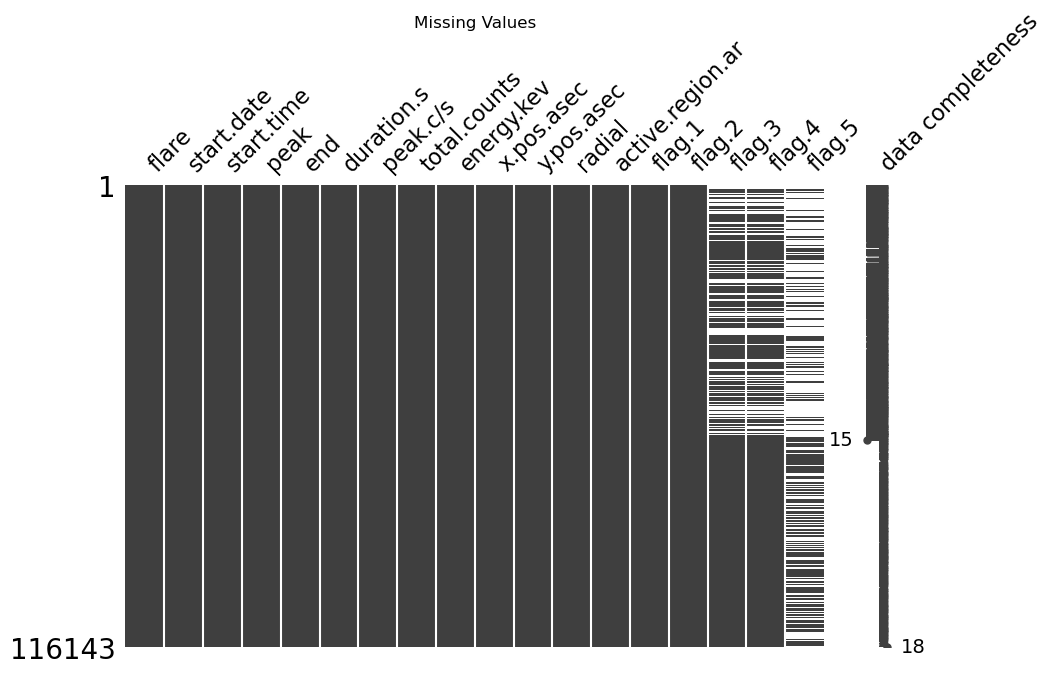

In [7]:
# Méthode de visualisation des données manquantes

msno.matrix(df,figsize=(10,6),
    width_ratios=(15, 1),
    color=(0.25, 0.25, 0.25),
    fontsize=16,
    labels="Missing_Fields",
    label_rotation=45)
plt.title("Missing Values")
plt.show()





Les valeurs manquantes peuvent refléter des limites instrumentales, des erreurs humaines ou des absences réelles de phénomènes. Leur traitement dépend de l'analyse souhaitée et de la nature des données.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analyse Exploratoire de Données

##  

## **Matrice de corrélation**

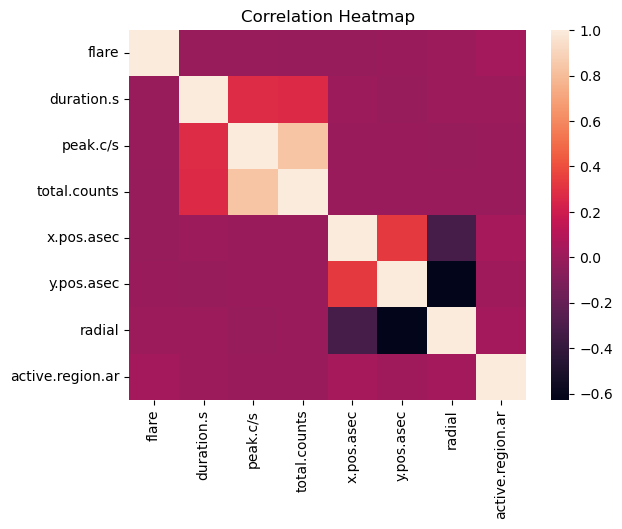

In [8]:
# Et les corrélations entre les variables numériques

df_num = df.select_dtypes('number')
df_num = pd.DataFrame(df_num)

correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()


La heatmap montre que certaines relations, comme entre "duration.s" et "total.counts" ou entre "peak.c/s" et "total.counts", sont attendues et reflètent des phénomènes solaires naturels. D'autres relations, comme les corrélations négatives entre la position et la distance radiale, peuvent être liées aux configurations géométriques des observations.

## **Durées des tempêtes solaires**

Dans un premier temps nous nous intéressons à la durée d'une tempête solaire. Pour ce faire nous allons realiser un graphique qui représente la répartition des durées des tempêtes solaires. Afin de faciliter la comparaison, nous afficherons également la durée moyenne d'une tempête solaire.

Nous avons fait le choix de faire une représentation  de ces données sous forme d'histogramme, car au vu la quantité de données, il nous paraît pertinent de diviser les durées en intervalles spécifiques.

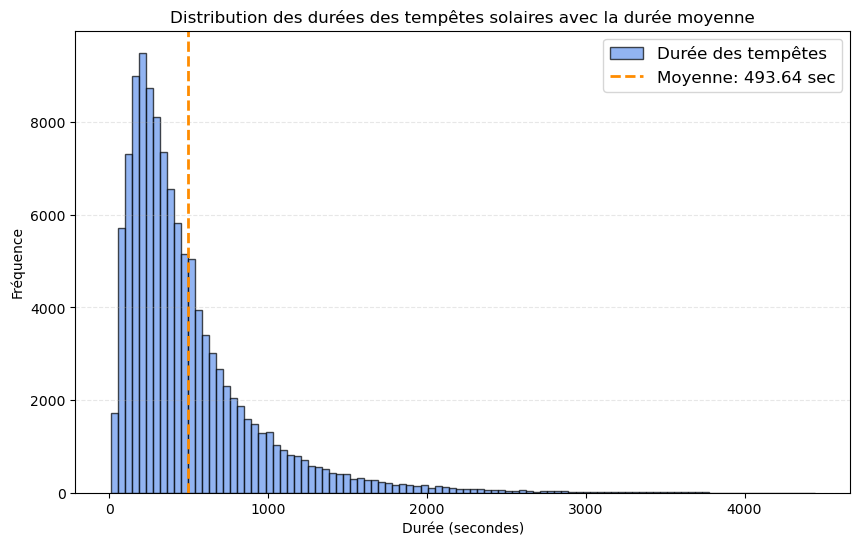

In [9]:
# Calcul durée moyenne
mean_duration = df['duration.s'].mean()

# Histogramme
plt.figure(figsize=(10, 6))
plt.hist(df['duration.s'], bins= 100, color='cornflowerblue', edgecolor='black', alpha=0.7, label='Durée des tempêtes')
plt.axvline(mean_duration, color='darkorange', linestyle='dashed', linewidth=2, label=f'Moyenne: {mean_duration:.2f} sec')
plt.title('Distribution des durées des tempêtes solaires avec la durée moyenne')
plt.xlabel('Durée (secondes)')
plt.ylabel('Fréquence')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [10]:
# Convertir la colonne 'start.date' en format datetime si nécessaire et extraire l'année
df['start.date'] = pd.to_datetime(df['start.date'], errors='coerce')  #  Met sous la convention année-mois-jour Conversion sécurisée
df['year'] = df['start.date'].dt.year # extrait l'année

# Vérification que la colonne 'year' a bien été ajoutée
df[['start.date', 'year']].head()

,start.date,year
0,2002-02-12,2002
1,2002-02-12,2002
2,2002-02-13,2002
3,2002-02-13,2002
4,2002-02-13,2002


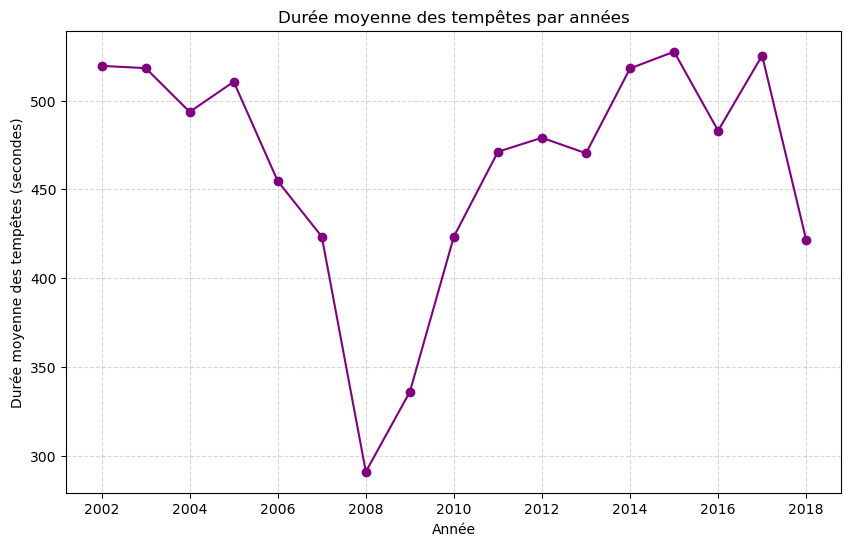

In [11]:
# Calculer la durée moyenne par année
duration_par_annee= df.groupby('year')['duration.s'].mean()

# Compter le nombre de tempêtes par année
tempetes_par_annee = df.groupby('year').size()

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(tempetes_par_annee.index, duration_par_annee.values, marker='o', linestyle='-', color='purple')
plt.title('Durée moyenne des tempêtes par années')
plt.xlabel('Année')
plt.ylabel('Durée moyenne des tempêtes (secondes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




Nous pouvons nous demander comment expliquer la chute en 2008.

## **Nombre de tempêtes solaires par mois**

Il est nécessaire de comprendre les tendances saisonnières de l'activité solaire. En effet, les tempêtes solaires sont souvent associées à des cycles d'activité solaire (dure 11 ans en général) donc étudier la distribution des tempêtes solaires par mois permet d'observer les pics d'activité solaire et les périodes de calme.
Ainsi on peut prévoir les tempêtes solaires (utile pour prévoir les aurores boréales).


In [12]:
# Extraire l'année et le mois de la colonne 'start.date'
df['year_month'] = df['start.date'].dt.to_period('M') # prend le mois

# Compter le nombre de tempêtes par mois
tempetes_par_mois = df.groupby('year_month').size()

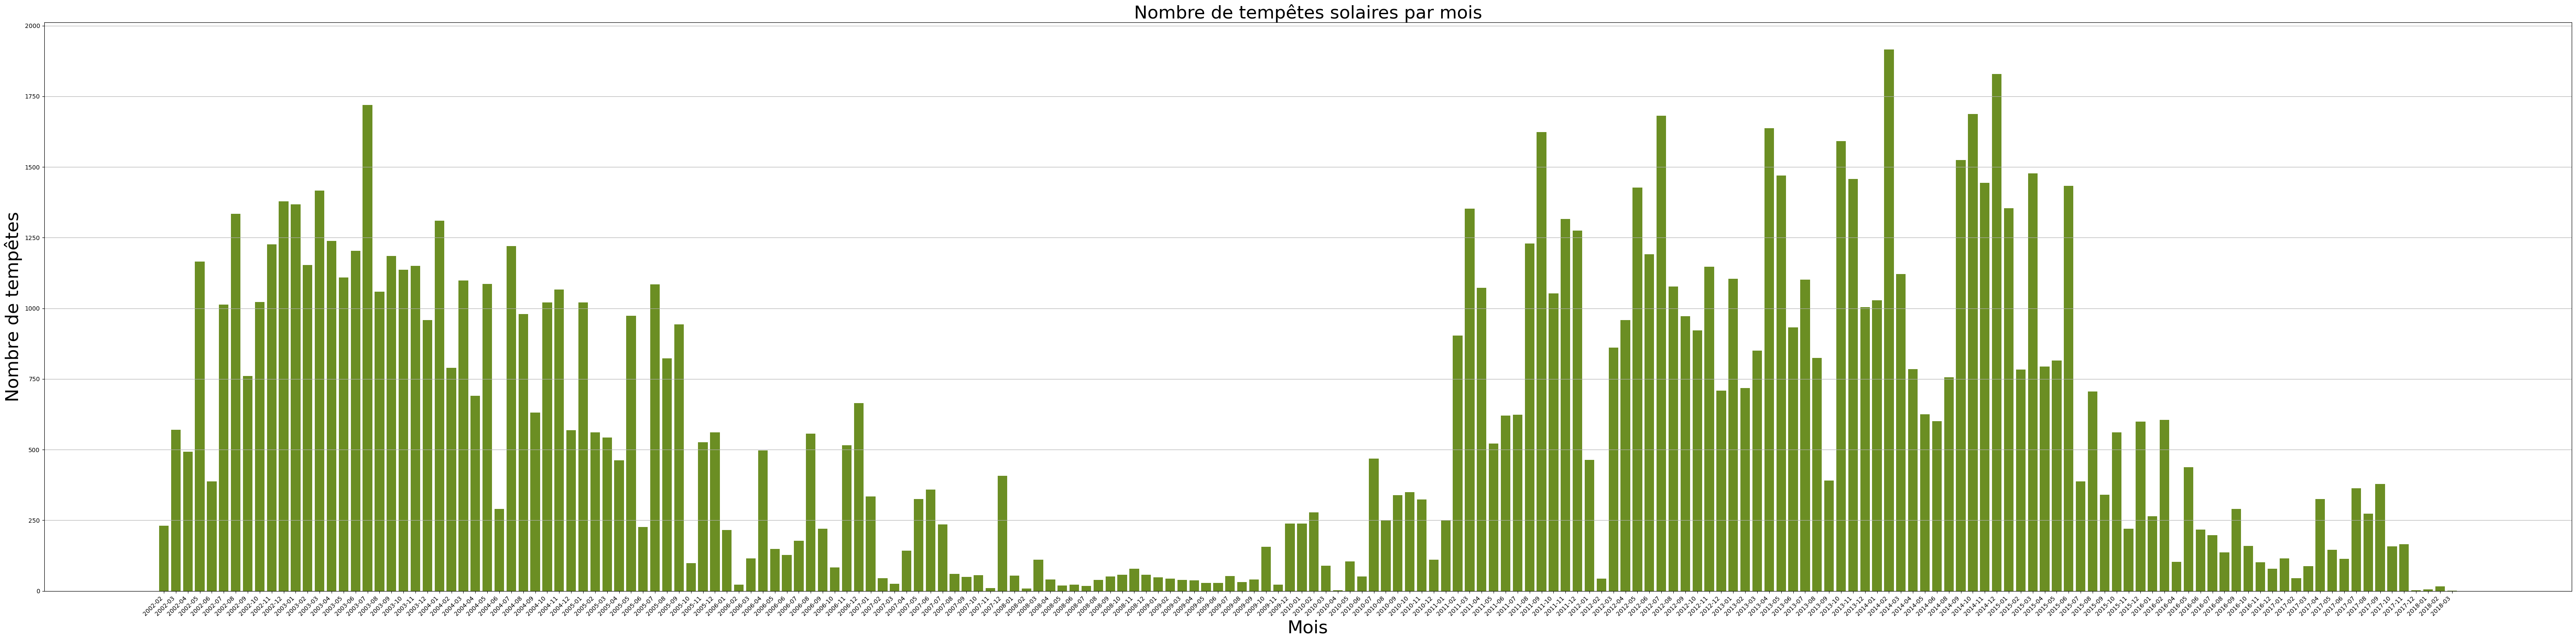

In [13]:
# Compter combien y a de tempêtes par mois
tempetes_par_mois = df.groupby('year_month').size()

# Tracer l'histogramme
plt.figure(figsize=(60, 15))
plt.bar(tempetes_par_mois.index.astype(str), tempetes_par_mois.values, color='olivedrab')
plt.title('Nombre de tempêtes solaires par mois', fontsize=30)
plt.xlabel('Mois', fontsize=30)
plt.ylabel('Nombre de tempêtes', fontsize=30)

# Rotation des ticks et espacement pour les rendre lisibles
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Ajouter une grille sur l'axe des y pour plus de lisibilité
plt.tight_layout()
plt.show()


## **L'aspect énergétique**

La chute dans le deuxième graphe 'Durée moyenne des tempêtes par années' souligne la periode froide du cycle solaire.

L'histogramme montre une distribution asymétrique avec un pic important pour les énergies faibles (6-12 keV) et une queue étendue vers des valeurs plus élevées. Cela reflète la nature des éruptions solaires, où les événements petits sont très fréquents, mais les événements extrêmes sont rares et significatifs.



In [14]:
from sklearn.preprocessing import LabelEncoder #Afin de "convertir" les données catégoriques en données numériques
le = LabelEncoder()
df['energy.kev2'] = le.fit_transform(df['energy.kev'])

In [15]:
def get_season(date):
    month = date.month
    if month in [12,1,2]:
         return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    elif month in [9, 10, 11]:
        return 'Automne'
df['season'] = df['start.date'].apply(get_season)

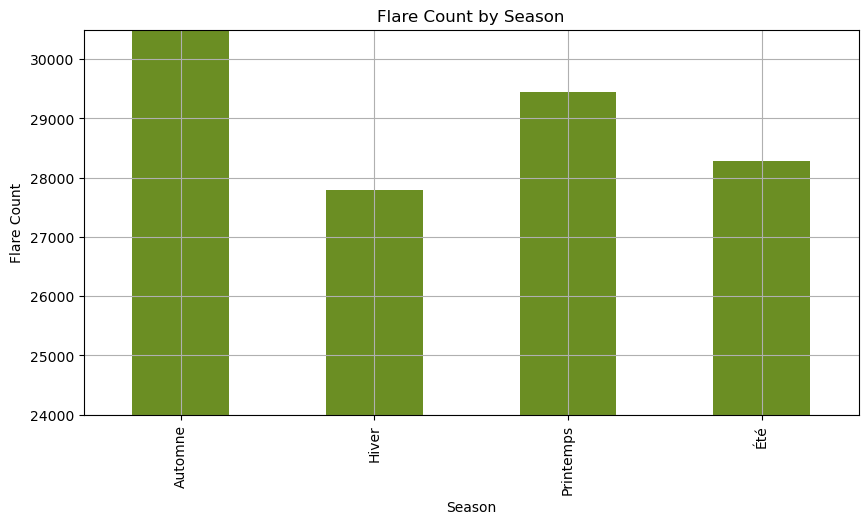

In [16]:
# Energy selon Season Histogramm
plt.figure(figsize=(10, 5))
df.groupby('season')['total.counts'].count().plot(kind='bar', title='Flare Count by Season', color='olivedrab')
plt.xlabel('Season')
plt.grid(True)
plt.ylim(24000, 30500)
plt.ylabel('Flare Count')
plt.show()


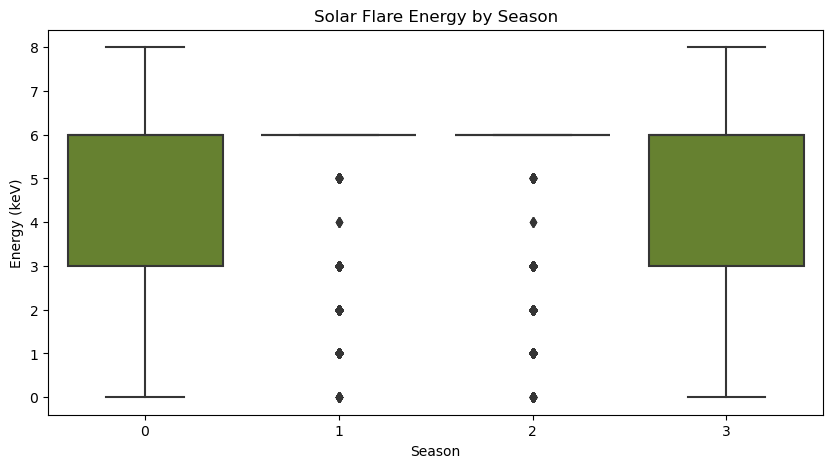

In [17]:
# Solar Flare Energy by Season

"On encode les valeurs catégorielle en numérique pour les adapter aux représentations graphiques "
df['season'] = le.fit_transform(df['season'])
df['energy.kev'] = le.fit_transform(df['energy.kev'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='energy.kev', data=df, color='olivedrab')
plt.title('Solar Flare Energy by Season')
plt.xlabel('Season')
plt.ylabel('Energy (keV)')
plt.show()

Analyse comparative entre les saisons :

- Les saisons 0 et 3 montrent une distribution plus large de l'énergie avec des valeurs médianes similaires.
- Les saisons 1 et 2 présentent une distribution très restreinte (quasi inexistante), ce qui suggère que les données pour ces saisons pourraient être biaisées ou moins variées.
- Les valeurs aberrantes sont présentes dans toutes les saisons, mais plus fréquentes dans les saisons 1 et 2.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion 

Grâce aux données collectées par le satellite RHESSI, nous avons exploré la relation entre différents paramètres de l'activité solaire, notamment l'énergie des éruptions solaires, leur durée, et leur occurrence en fonction du temps.
Une attention particulière a été portée à la gestion et à l’analyse des données manquantes pour garantir la fiabilité des résultats.



--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Authors


### Lina BENZAKOUR, Julie BARNY, Adel BELGROUN

--------------------------------------------------------------------------------------------------------------------------------------------------------------------